In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
def xi(mu,n=100):
    xi = np.zeros(n)
    xi[0] = random.random()
    for i in range(1,n):
        xi[i] = mu * xi[i-1] * (1-xi[i-1])
    return xi

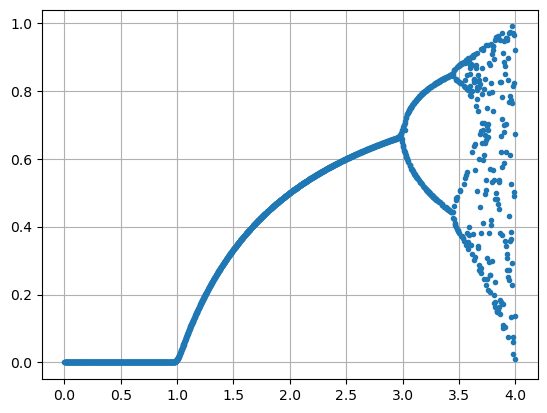

In [3]:
N = 2000
mus = np.linspace(0,4,N)
val = np.zeros(N)
for i in range(N):
    val[i] = xi(mus[i])[-1]

plt.figure()
plt.plot(mus,val,".")
plt.grid()
plt.show()

In [166]:
def F(t,Ys,w0,alpha,f,w):
    diff = -(w0**2 * np.sin(Ys[0])) - (alpha*Ys[1]) + (f*np.cos(w*t))
    return np.array([Ys[1],diff])

In [180]:
def F_free(t,Ys):
    return F(t,Ys,1,0,0,0)
def F_fric(t,Ys,alpha=0.1):
    return F(t,Ys,1,alpha,0,0)
def F_all(t,Ys,alpha=0.1,f=1,w=2):
    return F(t,Ys,1,alpha,f,w)

In [168]:
def RK4(t,inits,F,h):
    vals = np.zeros((len(t),2))
    vals[0] = inits
    for i in range(1,len(t)):
        k1 = h*F(t[i] , vals[i-1])
        k2 = h*F(t[i]+h/2 , vals[i-1]+(k1/2))
        k3 = h*F(t[i]+h/2 , vals[i-1]+(k2/2))
        k4 = h*F(t[i]+h , vals[i-1]+k3)
        vals[i] = vals[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    return vals

In [169]:
def run(x,dx,h,F):
    t = np.arange(0,5*np.pi,h)
    inits = np.array([x,dx])
    vals = RK4(t,inits,F,h)
    return t,vals

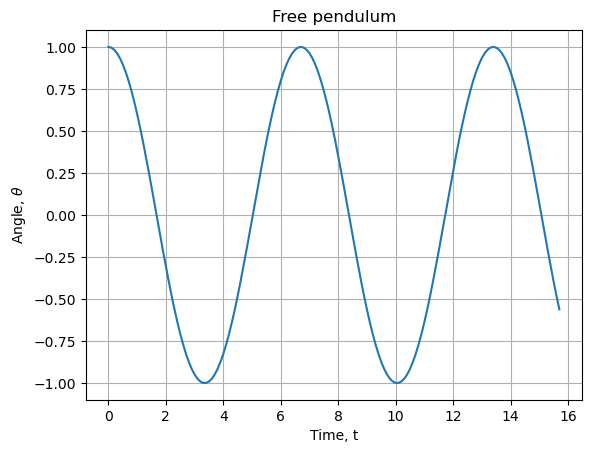

In [170]:
ts,xs = run(1,0,0.1,F_free)
plt.figure()
plt.title("Free pendulum")
plt.plot(ts,xs[:,0])
plt.grid()
plt.xlabel("Time, t")
plt.ylabel(r"Angle, $\theta$")
plt.show()

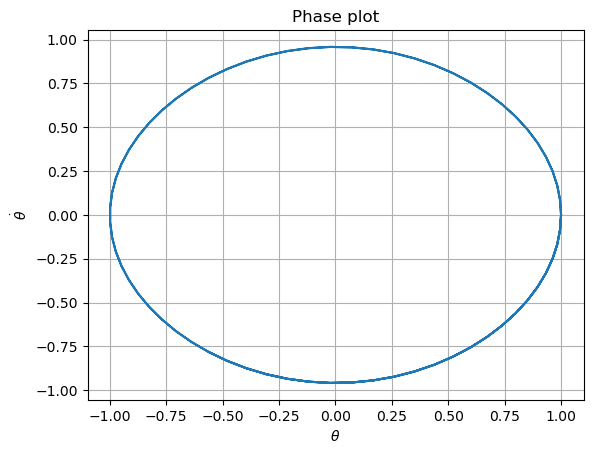

In [171]:
plt.figure()
plt.title("Phase plot")
plt.plot(xs[:,0],xs[:,1])
plt.grid()
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.show()

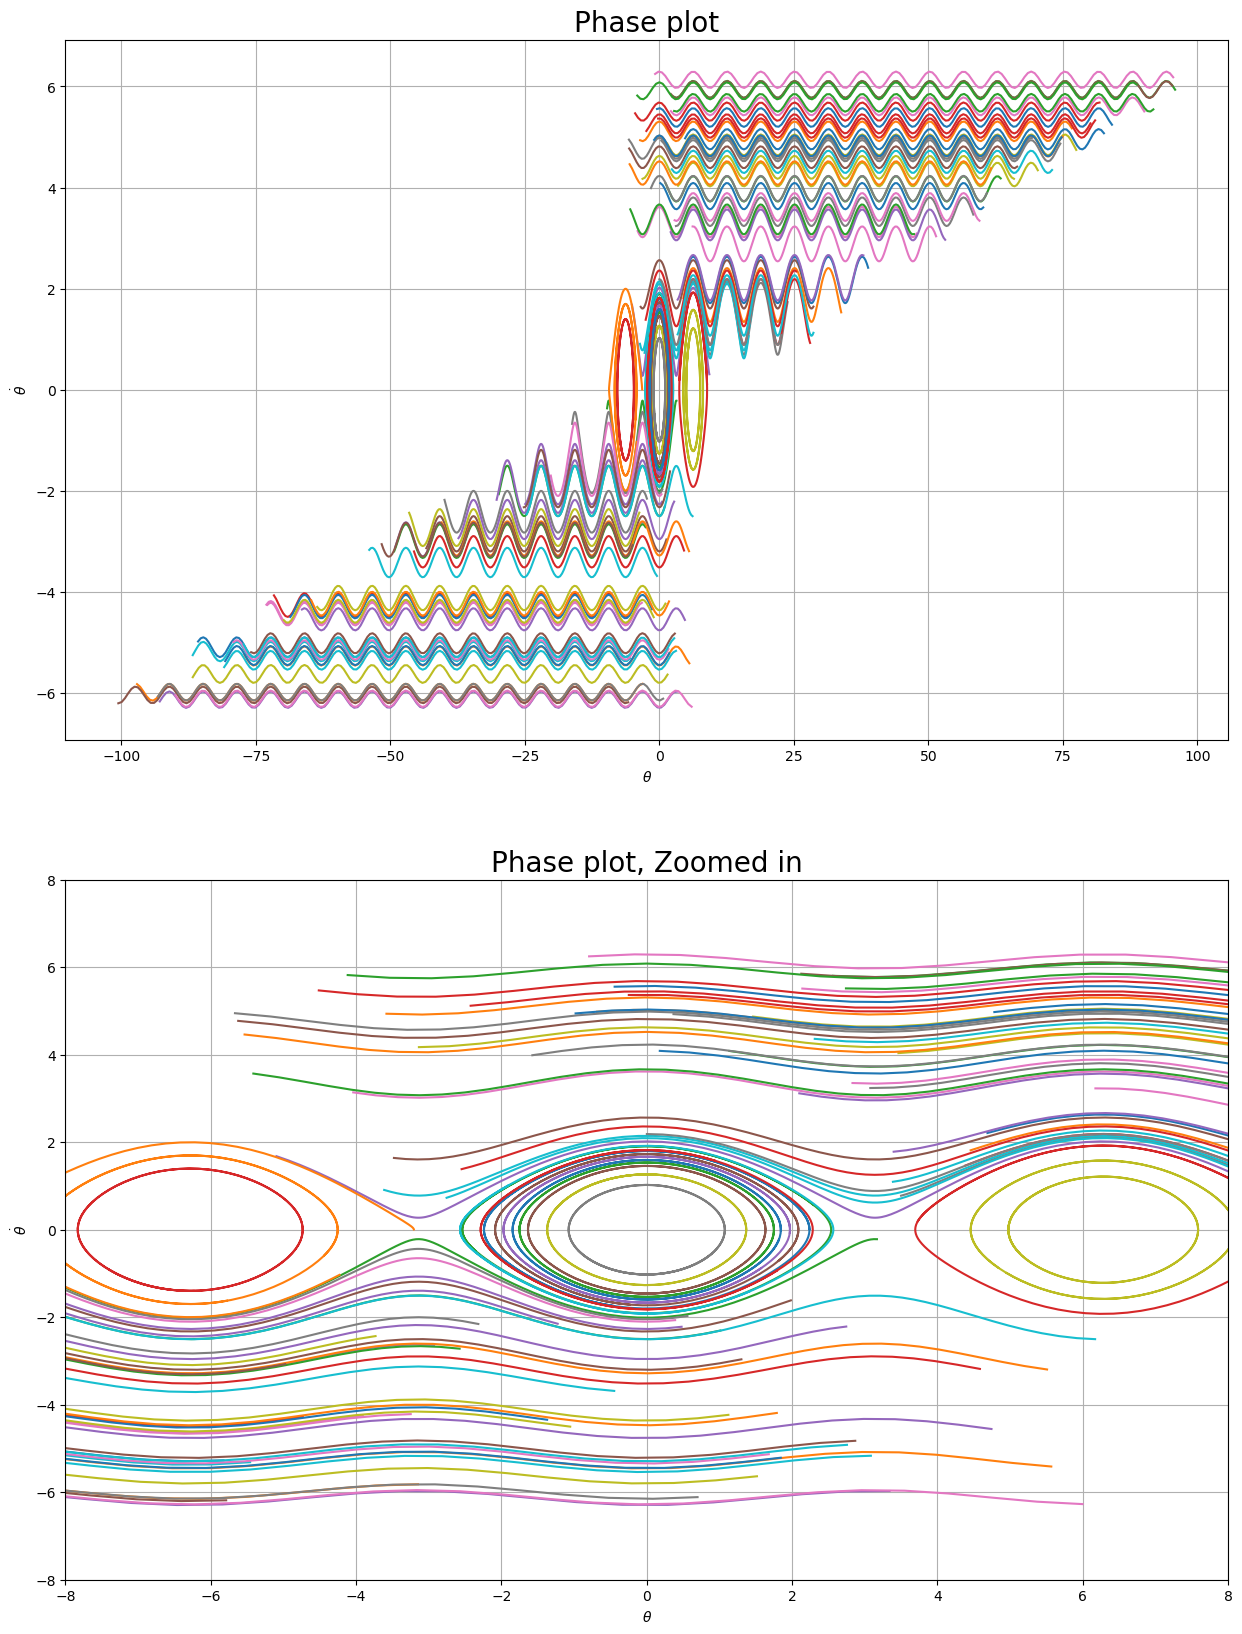

In [172]:
N = 100
x_vals = np.array([random.uniform(-2*np.pi,2*np.pi) for i in range(N)])
dx_vals = np.array([random.uniform(-2*np.pi,2*np.pi) for i in range(N)])

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(15, 20))
ax[0].set_title("Phase plot",size=20)
ax[1].set_title("Phase plot, Zoomed in",size=20)
for i in range(N):
    t_pp,x_pp = run(x_vals[i],dx_vals[i],0.1,F_free)
    ax[0].plot(x_pp[:,0],x_pp[:,1])
    ax[1].plot(x_pp[:,0],x_pp[:,1])
ax[1].set_xlim(-8,8)
ax[1].set_ylim(-8,8)
ax[0].grid()
ax[1].grid()
ax[0].set(xlabel=r"$\theta$",ylabel=r"$\dot{\theta}$")
ax[1].set(xlabel=r"$\theta$",ylabel=r"$\dot{\theta}$")
plt.show()

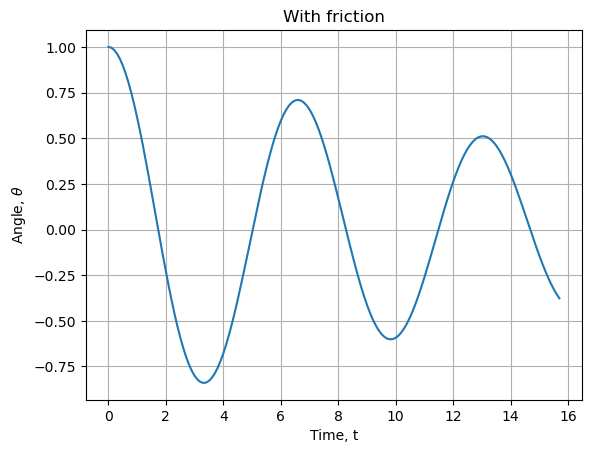

In [175]:
t_a,x_a = run(1,0,0.1,F_fric)
plt.figure()
plt.title("With friction")
plt.plot(t_a,x_a[:,0])
plt.grid()
plt.xlabel("Time, t")
plt.ylabel(r"Angle, $\theta$")
plt.show()

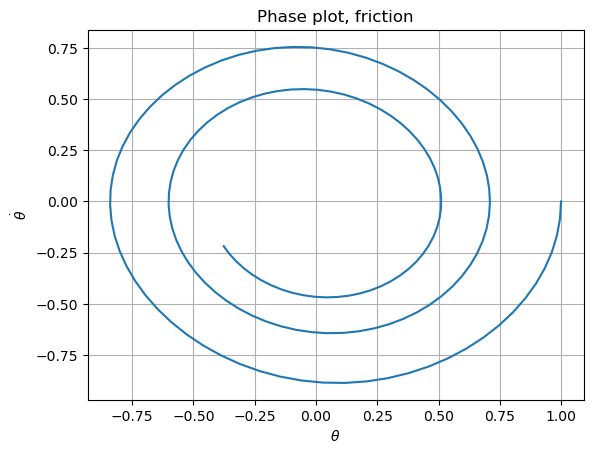

In [177]:
plt.figure()
plt.title("Phase plot, friction")
plt.plot(x_a[:,0],x_a[:,1])
plt.grid()
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.show()

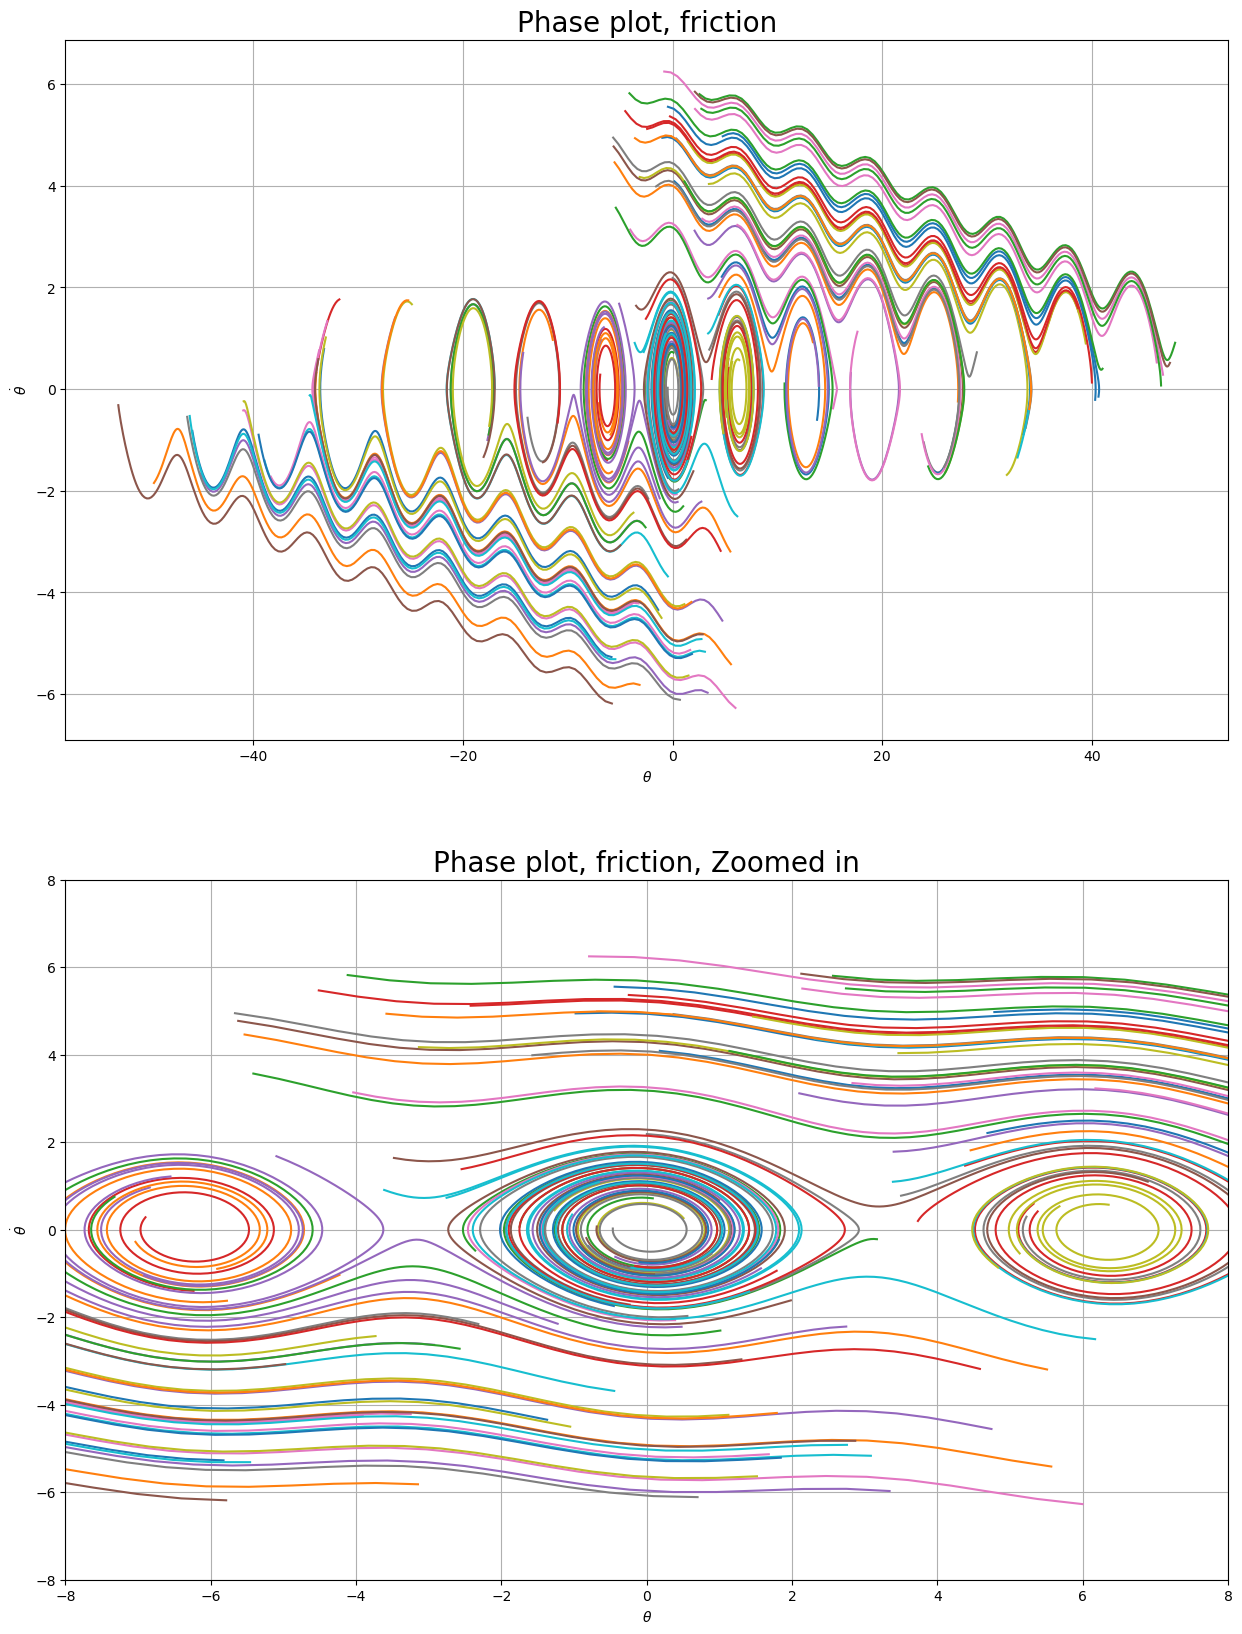

In [179]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(15, 20))
ax[0].set_title("Phase plot, friction",size=20)
ax[1].set_title("Phase plot, friction, Zoomed in",size=20)
for i in range(N):
    t_pp_a,x_pp_a = run(x_vals[i],dx_vals[i],0.1,F_fric)
    ax[0].plot(x_pp_a[:,0],x_pp_a[:,1])
    ax[1].plot(x_pp_a[:,0],x_pp_a[:,1])
ax[1].set_xlim(-8,8)
ax[1].set_ylim(-8,8)
ax[0].grid()
ax[1].grid()
ax[0].set(xlabel=r"$\theta$",ylabel=r"$\dot{\theta}$")
ax[1].set(xlabel=r"$\theta$",ylabel=r"$\dot{\theta}$")
plt.show()

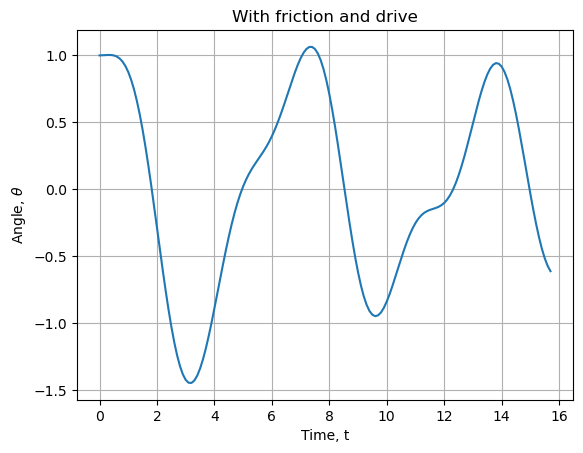

In [181]:
t_all,x_all = run(1,0,0.1,F_all)
plt.figure()
plt.title("With friction and drive")
plt.plot(t_all,x_all[:,0])
plt.grid()
plt.xlabel("Time, t")
plt.ylabel(r"Angle, $\theta$")
plt.show()

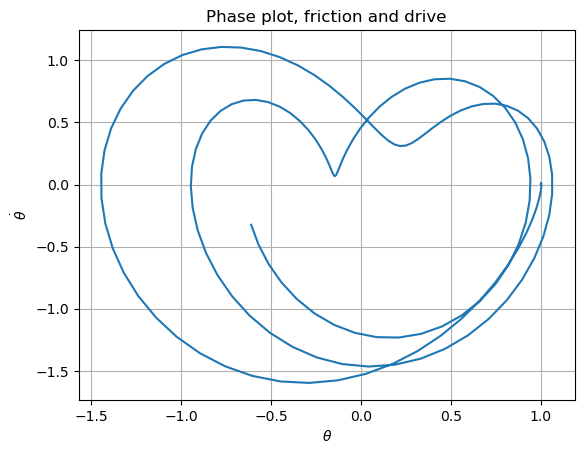

In [182]:
plt.figure()
plt.title("Phase plot, friction and drive")
plt.plot(x_all[:,0],x_all[:,1])
plt.grid()
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.show()

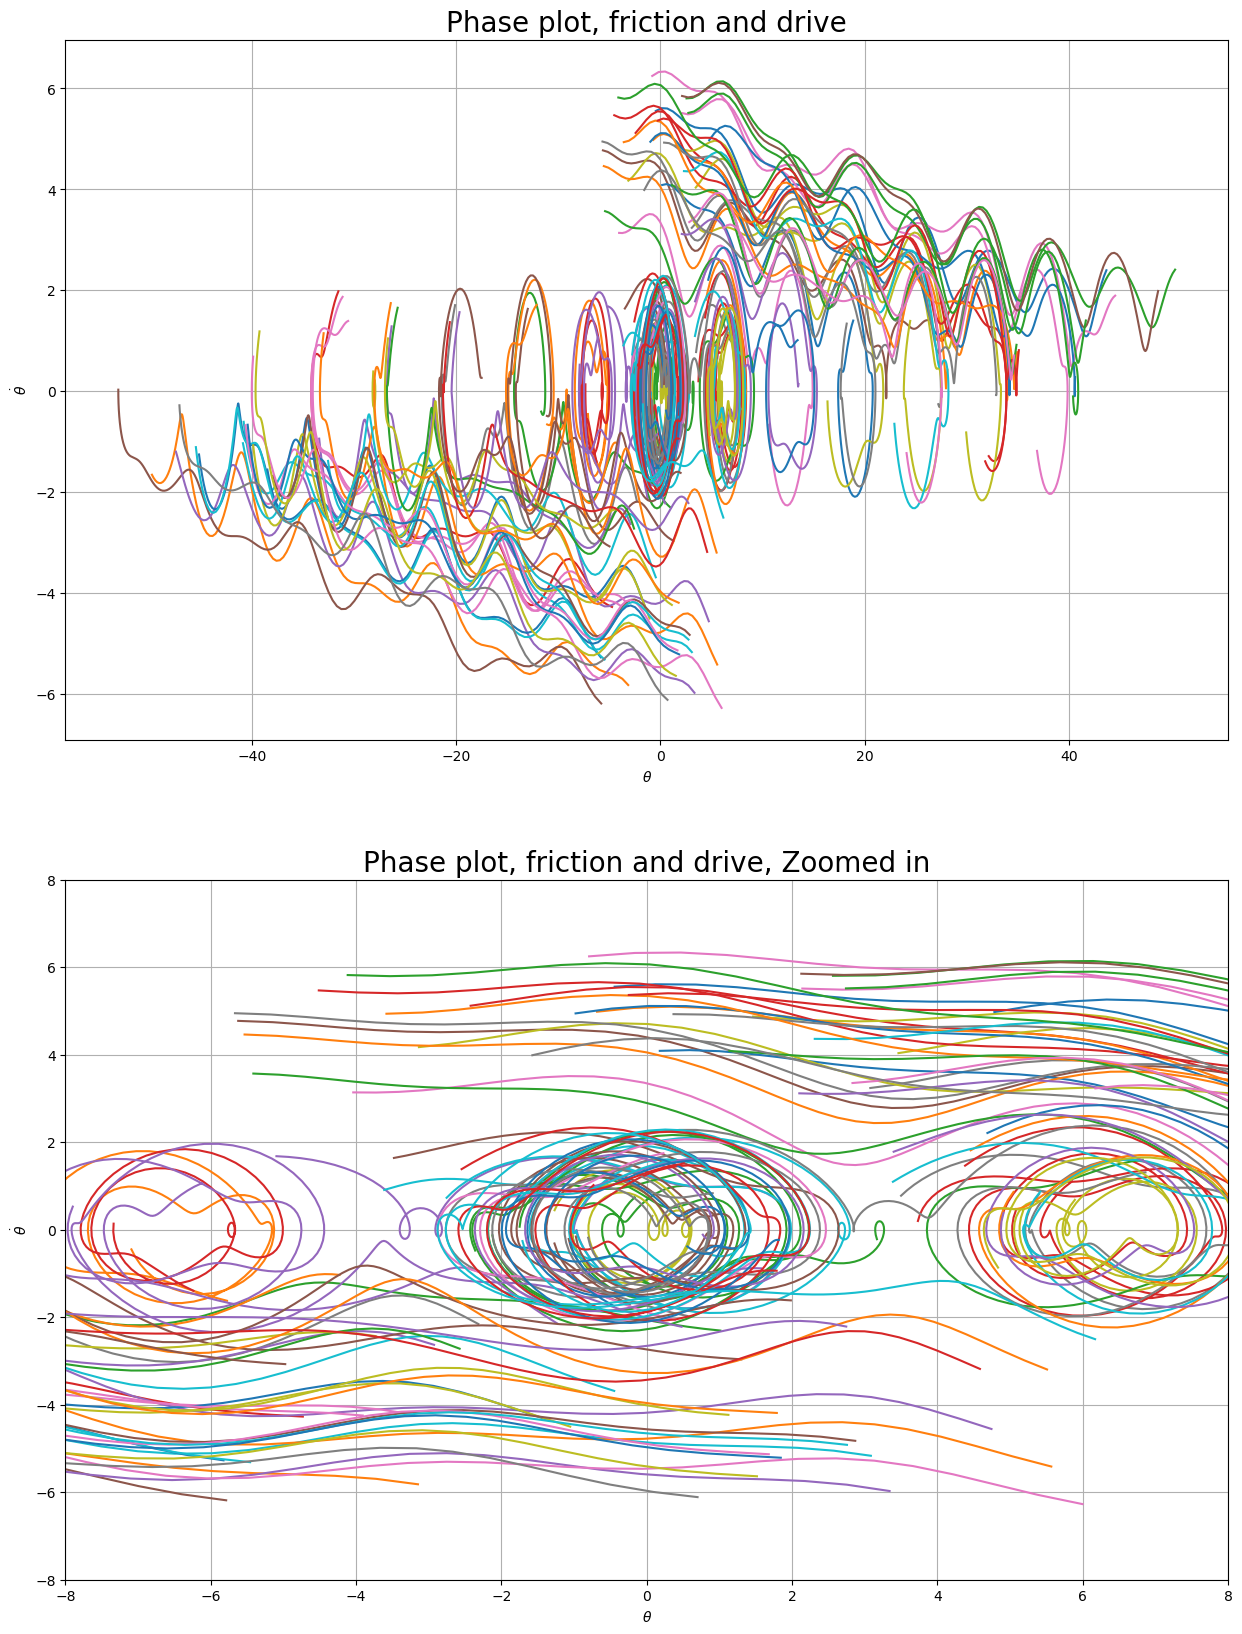

In [183]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(15, 20))
ax[0].set_title("Phase plot, friction and drive",size=20)
ax[1].set_title("Phase plot, friction and drive, Zoomed in",size=20)
for i in range(N):
    t_pp_all,x_pp_all = run(x_vals[i],dx_vals[i],0.1,F_all)
    ax[0].plot(x_pp_all[:,0],x_pp_all[:,1])
    ax[1].plot(x_pp_all[:,0],x_pp_all[:,1])
ax[1].set_xlim(-8,8)
ax[1].set_ylim(-8,8)
ax[0].grid()
ax[1].grid()
ax[0].set(xlabel=r"$\theta$",ylabel=r"$\dot{\theta}$")
ax[1].set(xlabel=r"$\theta$",ylabel=r"$\dot{\theta}$")
plt.show()